# Predictive Modeling to Improve Success Rate of Bank Direct Marketing Campaign

# 1. Loading the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, auc, roc_auc_score
import os
import seaborn as sns
%matplotlib inline


# 2. Loading the Dataset

In [2]:
df = pd.read_csv('marketing-data.csv')

# 3. Exploratory Data Analysis, Feature Engeeniring and Feature Selection

## a. View Data Attributes

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
is_success    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.is_success.value_counts()

no     39922
yes     5289
Name: is_success, dtype: int64

In [7]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [8]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## b. Check Missing Values other than unkowns.

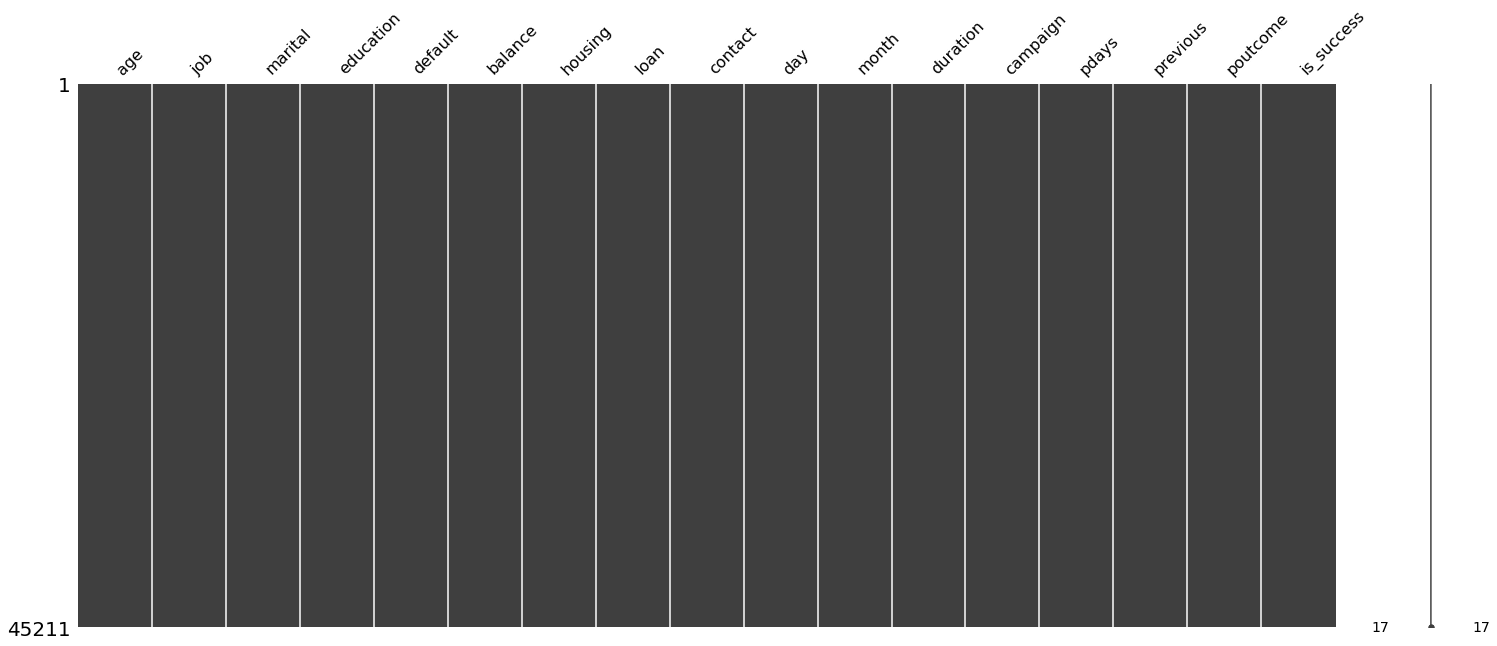

In [9]:
msno.matrix(df)

In [10]:
pd.isnull(df).any()

age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
is_success    False
dtype: bool

## c. Split the Numeric and Object data types

In [11]:
df_numerics = df.select_dtypes(exclude=[object])

In [12]:
df_objects = df.select_dtypes(include=[object])

## d. Check the correlation for numeric variables

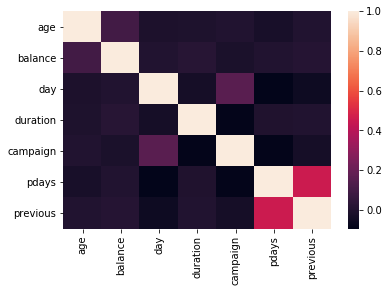

In [13]:
corr = df_numerics.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
df['is_success']=np.where(df['is_success']=='yes',1,0)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## e. Converting pdays into categorical

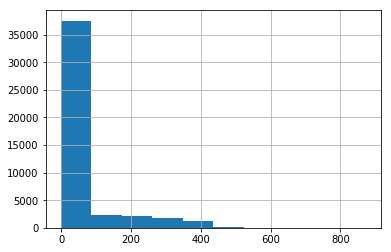

In [16]:
df.pdays.hist()


In [17]:
bins = [-1, 0, 150, 300, 450, 600]

In [18]:
group_names = ['No Contact', '0 to 150', '151 to 300', '301 to 450', '451 to 600']

In [19]:
df['pdays_categories'] = pd.cut(df['pdays'], bins, labels=group_names)

In [20]:
df.pdays_categories.value_counts()

151 to 300    3441
0 to 150      2346
301 to 450    2299
451 to 600     119
No Contact       0
Name: pdays_categories, dtype: int64

In [21]:
df['pdays_categories'] = df['pdays_categories'].fillna('No Contact')

In [22]:
df['pdays_categories'] = df.pdays_categories.astype('object')

In [23]:
df = df.drop(['pdays'], axis=1)

## f. Dummy variables for Object variables

In [24]:
df_dummy=pd.get_dummies(df)

In [25]:
df_dummy.shape

(45211, 56)

In [26]:
df_dummy.head()

,age,balance,day,duration,campaign,previous,is_success,job_admin.,job_blue-collar,job_entrepreneur,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_categories_0 to 150,pdays_categories_151 to 300,pdays_categories_301 to 450,pdays_categories_451 to 600,pdays_categories_No Contact
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## g. Bivariate analysis

In [27]:
df.groupby('is_success').mean()

,age,balance,day,duration,campaign,previous
is_success,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,1.170354


In [28]:
impute_grps = df.pivot_table(values=["is_success"], index=["marital"], aggfunc=np.count_nonzero)
print impute_grps


          is_success
marital             
divorced         622
married         2755
single          1912


In [29]:
def percConvert(ser):
  return ser/float(ser[-1])

In [30]:
pd.crosstab(df["marital"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
marital,,,
divorced,0.880545,0.119455,1.0
married,0.898765,0.101235,1.0
single,0.850508,0.149492,1.0
All,0.883015,0.116985,1.0


In [31]:
pd.crosstab(df["job"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
job,,,
admin.,0.877973,0.122027,1.0
blue-collar,0.927250,0.072750,1.0
entrepreneur,0.917283,0.082717,1.0
housemaid,0.912097,0.087903,1.0
management,0.862444,0.137556,1.0
retired,0.772085,0.227915,1.0
self-employed,0.881571,0.118429,1.0
services,0.911170,0.088830,1.0
student,0.713220,0.286780,1.0


In [32]:
pd.crosstab(df["education"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
education,,,
primary,0.913735,0.086265,1.0
secondary,0.894406,0.105594,1.0
tertiary,0.849936,0.150064,1.0
unknown,0.864297,0.135703,1.0
All,0.883015,0.116985,1.0


In [33]:
pd.crosstab(df["default"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
default,,,
no,0.882039,0.117961,1.0
yes,0.936196,0.063804,1.0
All,0.883015,0.116985,1.0


In [34]:
pd.crosstab(df["housing"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
housing,,,
no,0.832976,0.167024,1.0
yes,0.923000,0.077000,1.0
All,0.883015,0.116985,1.0


In [35]:
pd.crosstab(df["loan"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
loan,,,
no,0.873443,0.126557,1.0
yes,0.933186,0.066814,1.0
All,0.883015,0.116985,1.0


In [36]:
pd.crosstab(df["contact"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
contact,,,
cellular,0.850811,0.149189,1.0
telephone,0.865795,0.134205,1.0
unknown,0.959293,0.040707,1.0
All,0.883015,0.116985,1.0


In [37]:
pd.crosstab(df["month"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
month,,,
apr,0.803206,0.196794,1.0
aug,0.889867,0.110133,1.0
dec,0.532710,0.467290,1.0
feb,0.833522,0.166478,1.0
jan,0.898788,0.101212,1.0
jul,0.909065,0.090935,1.0
jun,0.897772,0.102228,1.0
mar,0.480084,0.519916,1.0
may,0.932805,0.067195,1.0


In [38]:
pd.crosstab(df["poutcome"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
poutcome,,,
failure,0.873903,0.126097,1.0
other,0.833152,0.166848,1.0
success,0.352747,0.647253,1.0
unknown,0.908385,0.091615,1.0
All,0.883015,0.116985,1.0


In [39]:
pd.crosstab(df["pdays_categories"],df["is_success"],margins=True).apply(percConvert, axis=1)

is_success,0,1,All
pdays_categories,,,
0 to 150,0.658568,0.341432,1.0
151 to 300,0.778553,0.221447,1.0
301 to 450,0.882993,0.117007,1.0
451 to 600,0.546218,0.453782,1.0
No Contact,0.908042,0.091958,1.0
All,0.883015,0.116985,1.0


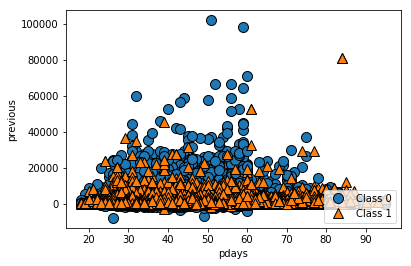

In [40]:
## plot the classes 
mglearn.discrete_scatter(df['age'].values,df['balance'].values,df['is_success'].values)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("pdays")
plt.ylabel("previous")

In [41]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

In [42]:
chisq_of_df_cols(df,'job','is_success')

(836.10548774719655,
 3.3371219449355017e-172,
 11L,
 array([[ 4566.0715755 ,  8593.5038818 ,  1313.04359559,  1094.93884232,
          8351.55771825,  1999.14640242,  1394.28099356,  3668.04512176,
           828.2682533 ,  6708.26643958,  1150.56879963,   254.30837628],
        [  604.9284245 ,  1138.4961182 ,   173.95640441,   145.06115768,
          1106.44228175,   264.85359758,   184.71900644,   485.95487824,
           109.7317467 ,   888.73356042,   152.43120037,    33.69162372]]))

In [43]:
chisq_of_df_cols(df,'marital','is_success')

(196.49594565603959,
 2.1450999986791486e-43,
 2L,
 array([[  4597.86012254,  24030.37552808,  11293.76434938],
        [   609.13987746,   3183.62447192,   1496.23565062]]))

In [44]:
chisq_of_df_cols(df,'education','is_success')

(238.92350616407606,
 1.6266562124072994e-51,
 3L,
 array([[  6049.5371038 ,  20487.71856407,  11744.98511424,   1639.75921789],
        [   801.4628962 ,   2714.28143593,   1556.01488576,    217.24078211]]))

In [45]:
chisq_of_df_cols(df,'default','is_success')

(22.202249955716852,
 2.4538606753508344e-06,
 1L,
 array([[ 39202.34261574,    719.65738426],
        [  5193.65738426,     95.34261574]]))

In [46]:
chisq_of_df_cols(df,'housing','is_success')

(874.82244886798298,
 2.9187976050766331e-192,
 1L,
 array([[ 17731.82813917,  22190.17186083],
        [  2349.17186083,   2939.82813917]]))

In [47]:
chisq_of_df_cols(df,'loan','is_success')

(209.61698034978633,
 1.6650611634927559e-47,
 1L,
 array([[ 33525.4379244,   6396.5620756],
        [  4441.5620756,    847.4379244]]))

In [48]:
chisq_of_df_cols(df,'contact','is_success')

(1035.7142253562922,
 1.251738325340495e-225,
 2L,
 array([[ 25859.09999779,   2566.04215788,  11496.85784433],
        [  3425.90000221,    339.95784212,   1523.14215567]]))

In [49]:
chisq_of_df_cols(df,'day','is_success')

(574.05064348180019,
 6.8960050550986539e-102,
 30L,
 array([[  284.33089292,  1141.73864767,   952.77339585,  1275.95695738,
          1686.55902325,  1705.98535755,  1604.43861007,  1626.51398996,
          1378.38672005,   462.6999624 ,  1305.97947402,  1415.47335825,
          1399.57908474,  1631.81208113,  1503.7748778 ,  1249.46650152,
          1712.16646391,  2037.99907102,  1551.45769835,  2430.05781779,
          1788.98878591,   799.12875185,   829.1512685 ,   394.70779235,
           741.73276415,   913.92072726,   989.86003406,  1615.91780761,
          1540.861516  ,  1382.80179602,   567.77877065],
        [   37.66910708,   151.26135233,   126.22660415,   169.04304262,
           223.44097675,   226.01464245,   212.56138993,   215.48601004,
           182.61327995,    61.3000376 ,   173.02052598,   187.52664175,
           185.42091526,   216.18791887,   199.2251222 ,   165.53349848,
           226.83353609,   270.00092898,   205.54230165,   321.94218221,
           23

In [50]:
chisq_of_df_cols(df,'month','is_success')

(3061.8389384452685,
 0.0,
 11L,
 array([[  2589.00055296,   5516.19592577,    188.96525182,   2339.10725266,
           1238.87031917,   6088.3897724 ,   4716.18415872,    421.19824821,
          12155.58718011,   3505.57032581,    651.66521422,    511.26579815],
        [   342.99944704,    730.80407423,     25.03474818,    309.89274734,
            164.12968083,    806.6102276 ,    624.81584128,     55.80175179,
           1610.41281989,    464.42967419,     86.33478578,     67.73420185]]))

In [51]:
chisq_of_df_cols(df,'poutcome','is_success')

(4391.5065887686605,
 0.0,
 3L,
 array([[  4327.65747274,   1624.74795957,   1334.23596028,  32635.35860742],
        [   573.34252726,    215.25204043,    176.76403972,   4323.64139258]]))

In [52]:
chisq_of_df_cols(df,'pdays_categories','is_success')

(1862.6432913814867,
 0.0,
 4L,
 array([[  2.07155365e+03,   3.03845529e+03,   2.03005193e+03,
           1.05078808e+02,   3.26768603e+04],
        [  2.74446352e+02,   4.02544713e+02,   2.68948066e+02,
           1.39211917e+01,   4.32913968e+03]]))

## h. Data prep for modeling

In [53]:
X=df_dummy.ix[:,df_dummy.columns!='is_success']

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [54]:
X.shape

(45211, 55)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 55 columns):
age                            45211 non-null int64
balance                        45211 non-null int64
day                            45211 non-null int64
duration                       45211 non-null int64
campaign                       45211 non-null int64
previous                       45211 non-null int64
job_admin.                     45211 non-null uint8
job_blue-collar                45211 non-null uint8
job_entrepreneur               45211 non-null uint8
job_housemaid                  45211 non-null uint8
job_management                 45211 non-null uint8
job_retired                    45211 non-null uint8
job_self-employed              45211 non-null uint8
job_services                   45211 non-null uint8
job_student                    45211 non-null uint8
job_technician                 45211 non-null uint8
job_unemployed                 45211 non-null uint8
job_unk

In [56]:
y=df_dummy.is_success

In [57]:
y.reshape(-1,1)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[0],
       [0],
       [0],
       ..., 
       [1],
       [0],
       [0]])

In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_success, dtype: int32

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)

In [60]:
X_train.shape

(33908, 55)

In [61]:
X_test.shape

(11303, 55)

In [62]:
names = list(X_train.columns.values)

In [63]:
X_train_minus_duration = X_train.drop(['duration'], axis=1)

In [64]:
X_test_minus_duration = X_test.drop(['duration'], axis=1)

In [65]:
names1 = list(X_train_minus_duration.columns.values)

In [66]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select n attributes
rfe = RFE(model,56)
rfe = rfe.fit(X_train,y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# 3. Modeling

## a. Logistic Regression

In [67]:
logistic = LogisticRegression()
Model=logistic.fit(X_train,y_train)

In [68]:
Model.coef_

array([[  2.21830870e-03,   1.23930501e-05,   1.00146578e-02,
          4.23947275e-03,  -8.20740397e-02,   6.74025159e-03,
          3.78760696e-02,  -1.29688809e-01,  -3.68276193e-01,
         -3.83314896e-01,  -1.17461910e-01,   2.63927403e-01,
         -2.93282489e-01,  -9.91920758e-02,   5.07573303e-01,
         -1.28854752e-01,  -7.20320311e-02,  -7.27992496e-03,
         -2.74676507e-01,  -4.08297799e-01,  -1.07031999e-01,
         -4.34605761e-01,  -1.84286190e-01,   2.29784524e-02,
         -1.94092807e-01,  -3.37178369e-01,  -4.52827936e-01,
         -4.79797391e-02,  -7.42026566e-01,  -1.72269860e-01,
         -6.17736445e-01,   3.68943875e-01,   1.77698061e-01,
         -1.33664824e+00,  -6.42240791e-02,  -7.50272462e-01,
          4.86083582e-01,  -1.87573075e-01,  -1.41707260e+00,
         -9.12382091e-01,   4.11538450e-01,   1.40164657e+00,
         -4.53203659e-01,  -9.20596034e-01,   8.43347013e-01,
          7.72702078e-01,  -8.08688743e-01,  -6.59143361e-01,
        

In [69]:
# predict class labels for the training set
predictedtrain = Model.predict(X_train)
print predictedtrain

[0 1 0 ..., 0 0 0]


In [70]:
accuracy_logistic_train = round(accuracy_score(y_train, predictedtrain), 3)

In [71]:
cm_logistic_train = confusion_matrix(y_train, predictedtrain)

In [72]:
# predict class labels for the test set
predicted = Model.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [73]:
accuracy_logistic_test = round(accuracy_score(y_test, predicted), 3)

In [74]:
cm_logistic_test = confusion_matrix(y_test,predicted)

In [75]:
cm_logistic_test 

array([[9716,  278],
       [ 864,  445]])

In [76]:
print classification_report(y_test,predicted)

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      9994
          1       0.62      0.34      0.44      1309

avg / total       0.88      0.90      0.89     11303



In [77]:
auc_logistic_train = roc_auc_score(y_train, predictedtrain)
auc_logistic_test = roc_auc_score(y_test, predicted)

In [78]:
Model=logistic.fit(X_train_minus_duration,y_train)

In [79]:
Model.coef_

array([[  2.71132575e-03,   1.63971005e-05,   4.10619015e-03,
         -8.10190728e-02,   7.32540374e-03,  -8.09125570e-02,
         -6.52151827e-02,  -2.94641982e-01,  -2.76508549e-01,
         -9.75700131e-02,   3.39399539e-01,  -1.90105114e-01,
         -7.63180000e-02,   3.42897588e-01,  -1.41251482e-01,
          1.09548026e-01,  -5.84147776e-03,  -1.47054787e-01,
         -2.96120464e-01,   6.65604548e-03,  -3.21396625e-01,
         -8.36999463e-02,   6.95999566e-02,  -1.01022591e-01,
         -1.18081806e-01,  -3.18437399e-01,   4.41449677e-02,
         -4.80664173e-01,   6.60821776e-04,  -4.37180027e-01,
          4.08522605e-01,   1.75937228e-01,  -1.02097904e+00,
          6.47875179e-02,  -7.66887004e-01,   4.88464674e-01,
         -3.08508310e-01,  -1.04460919e+00,  -6.37524113e-01,
          3.16969076e-01,   1.06390123e+00,  -3.90781818e-01,
         -7.77571588e-01,   8.30761048e-01,   7.24479275e-01,
         -7.99862553e-01,  -5.15865231e-01,   1.39641114e+00,
        

In [80]:
# predict class labels for the training set
predictedtrain1 = Model.predict(X_train_minus_duration)
print predictedtrain1

[0 1 0 ..., 0 0 0]


In [81]:
accuracy_logistic_train1 = round(accuracy_score(y_train, predictedtrain1), 3)

In [82]:
cm_logistic_train1 = confusion_matrix(y_train, predictedtrain1)

In [83]:
# predict class labels for the training set
predicted1 = Model.predict(X_test_minus_duration)
print predicted1

[0 0 0 ..., 0 0 0]


In [84]:
accuracy_logistic_test1 = round(accuracy_score(y_test, predicted), 3)

In [85]:
cm_logistic_test1 = confusion_matrix(y_test,predicted)

In [86]:
auc_logistic_train1 = roc_auc_score(y_train, predictedtrain1)
auc_logistic_test1 = roc_auc_score(y_test, predicted1)

## b. Decision Tree

In [87]:
from sklearn import tree

In [88]:
dt = tree.DecisionTreeClassifier()

In [89]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [90]:
yhat_dt_train = dt.predict(X_train)

In [91]:
accuracy_dt_train = round(accuracy_score(y_train, yhat_dt_train), 3)

In [92]:
yhat_dt_test = dt.predict(X_test)

In [93]:
accuracy_dt_test = round(accuracy_score(y_test, yhat_dt_test), 3)

In [94]:
print(classification_report(y_test, yhat_dt_test))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93      9994
          1       0.46      0.46      0.46      1309

avg / total       0.87      0.87      0.87     11303



In [95]:
cm_dt_train = confusion_matrix(y_train, yhat_dt_train)

In [96]:
cm_dt_test = confusion_matrix(y_test, yhat_dt_test)

In [97]:
auc_dt_train = roc_auc_score(y_train, yhat_dt_train)
auc_dt_test = roc_auc_score(y_test, yhat_dt_test)

In [98]:
dt.fit(X_train_minus_duration, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [99]:
yhat_dt_train1 = dt.predict(X_train_minus_duration)

In [100]:
accuracy_dt_train1 = round(accuracy_score(y_train, yhat_dt_train1), 3)

In [101]:
yhat_dt_test1 = dt.predict(X_test_minus_duration)

In [102]:
accuracy_dt_test1 = round(accuracy_score(y_test, yhat_dt_test1), 3)

In [103]:
cm_dt_train1 = confusion_matrix(y_train, yhat_dt_train1)

In [104]:
cm_dt_test1 = confusion_matrix(y_test, yhat_dt_test1)

In [105]:
auc_dt_train1 = roc_auc_score(y_train, yhat_dt_train1)
auc_dt_test1 = roc_auc_score(y_test, yhat_dt_test1)

## c. SVC

In [106]:
from sklearn.svm import SVC

In [107]:
svc = SVC()

In [108]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
yhat_svc_train = svc.predict(X_train)

In [110]:
accuracy_svc_train = round(accuracy_score(y_train, yhat_svc_train), 3)

In [111]:
yhat_svc_test = svc.predict(X_test)

In [112]:
accuracy_svc_test = round(accuracy_score(y_test, yhat_svc_test), 3)

In [113]:
print(classification_report(y_test, yhat_svc_test))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      9994
          1       0.40      0.00      0.00      1309

avg / total       0.83      0.88      0.83     11303



In [114]:
cm_svc_train = confusion_matrix(y_train, yhat_svc_train)

In [115]:
cm_svc_test = confusion_matrix(y_test, yhat_svc_test)

In [118]:
auc_svc_train = roc_auc_score(y_train, yhat_svc_train)
auc_svc_test = roc_auc_score(y_test, yhat_svc_test)

In [119]:
svc.fit(X_train_minus_duration, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
yhat_svc_train1 = svc.predict(X_train_minus_duration)

In [121]:
accuracy_svc_train1 = round(accuracy_score(y_train, yhat_svc_train1), 3)

In [122]:
yhat_svc_test1 = svc.predict(X_test_minus_duration)

In [123]:
accuracy_svc_test1 = round(accuracy_score(y_test, yhat_svc_test1), 3)

In [124]:
cm_svc_train1 = confusion_matrix(y_train, yhat_svc_train1)

In [125]:
cm_svc_test1 = confusion_matrix(y_test, yhat_svc_test1)

In [126]:
auc_svc_train1 = roc_auc_score(y_train, yhat_svc_train1)
auc_svc_test1 = roc_auc_score(y_test, yhat_svc_test1)

## d. Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf = RandomForestClassifier()

In [129]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [130]:
yhat_rf_train = rf.predict(X_train)

In [131]:
accuracy_rf_train = round(accuracy_score(y_train, yhat_rf_train), 3)

In [132]:
accuracy_rf_train

0.993

In [133]:
yhat_rf_test = rf.predict(X_test)

In [134]:
accuracy_rf_test = round(accuracy_score(y_test, yhat_rf_test), 3)

In [135]:
accuracy_rf_test

0.899

In [136]:
print(classification_report(y_test, yhat_rf_test))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      9994
          1       0.62      0.34      0.44      1309

avg / total       0.88      0.90      0.89     11303



In [137]:
cm_rf_train = confusion_matrix(y_train, yhat_rf_train)

In [138]:
cm_rf_test = confusion_matrix(y_test, yhat_rf_test)

In [139]:
auc_rf_train = roc_auc_score(y_train, yhat_rf_train)
auc_rf_test = roc_auc_score(y_test, yhat_rf_test)

In [140]:
rf.fit(X_train_minus_duration, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [141]:
yhat_rf_train1 = rf.predict(X_train_minus_duration)

In [142]:
accuracy_rf_train1 = round(accuracy_score(y_train, yhat_rf_train1), 3)

In [143]:
yhat_rf_test1 = rf.predict(X_test_minus_duration)

In [144]:
accuracy_rf_test1 = round(accuracy_score(y_test, yhat_rf_test1), 3)

In [145]:
cm_rf_train1 = confusion_matrix(y_train, yhat_rf_train1)

In [146]:
cm_rf_test1 = confusion_matrix(y_test, yhat_rf_test1)

In [147]:
auc_rf_train1 = roc_auc_score(y_train, yhat_rf_train1)
auc_rf_test1 = roc_auc_score(y_test, yhat_rf_test1)

In [148]:
for feature in zip(names1, rf.feature_importances_):
    print(feature)

('age', 0.15083550473273347)
('balance', 0.17101749007016104)
('day', 0.12698401827472588)
('campaign', 0.062608814690462616)
('previous', 0.025774584330237778)
('job_admin.', 0.011540357903261005)
('job_blue-collar', 0.011374777712697881)
('job_entrepreneur', 0.0049321606689194369)
('job_housemaid', 0.0039929713199064144)
('job_management', 0.014340437177246765)
('job_retired', 0.0056127768074535171)
('job_self-employed', 0.0066804830044534438)
('job_services', 0.0091505212700389808)
('job_student', 0.0050887108606936854)
('job_technician', 0.013862881698250677)
('job_unemployed', 0.006076696362605041)
('job_unknown', 0.0016460858501272575)
('marital_divorced', 0.0084789848767661789)
('marital_married', 0.011890303725043459)
('marital_single', 0.010342816093372845)
('education_primary', 0.0091584440054520988)
('education_secondary', 0.016025584664037085)
('education_tertiary', 0.013979693754552653)
('education_unknown', 0.0067050088031144275)
('default_no', 0.0017705878061724395)
('de

In [149]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.001
sfm = SelectFromModel(rf, threshold=0.01)

# Train the selector
sfm.fit(X_train_minus_duration, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.01)

In [150]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(names1[feature_list_index])

age
balance
day
campaign
previous
job_admin.
job_blue-collar
job_management
job_technician
marital_married
marital_single
education_secondary
education_tertiary
housing_no
housing_yes
month_apr
month_aug
month_feb
month_jul
month_jun
month_mar
month_oct
poutcome_failure
poutcome_success


In [151]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train_minus_duration)
X_important_test = sfm.transform(X_test_minus_duration)

In [152]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [153]:

y_pred = clf_important.predict(X_important_test)

accuracy_rf_test2 = round(accuracy_score(y_test, y_pred),3)

In [154]:

y_pred_train = clf_important.predict(X_important_train)

accuracy_rf_train2=round(accuracy_score(y_train, y_pred_train),3)

In [155]:
cm_rf_train2 = confusion_matrix(y_train, y_pred_train)

In [156]:
cm_rf_test2 = confusion_matrix(y_test, y_pred)

In [157]:
auc_rfi_train2 = roc_auc_score(y_train, y_pred_train)
auc_rfi_test2 = roc_auc_score(y_test, y_pred)

# 3. Model Comparison and selection of the best

In [159]:
Accuracy = pd.Series([accuracy_logistic_train, accuracy_logistic_test,accuracy_logistic_train1, accuracy_logistic_test1,accuracy_dt_train1, accuracy_dt_test1, accuracy_svc_train, accuracy_svc_test,accuracy_svc_train1, accuracy_svc_test1, accuracy_rf_train, accuracy_rf_test,accuracy_rf_train1, accuracy_rf_test1,accuracy_rf_train2, accuracy_rf_test2])

AUC = pd.Series([auc_logistic_train, auc_logistic_test,auc_logistic_train1, auc_logistic_test1,auc_dt_train1, auc_dt_test1, auc_svc_train, auc_svc_test,auc_svc_train1, auc_svc_test1, auc_rf_train, auc_rf_test,auc_rf_train1, auc_rf_test1,auc_rfi_train2, auc_rfi_test2])

index = pd.Series(['Logistic_Train', 'Logistic_Test','Logistic_Train_minus_duration', 'Logistic_Test_minus_duration', 'DT_Train', 'DT_Test', 'SVC_Train', 'SVC_Test','SVC_Train_minus_duration', 'SVC_Test_minus_duration', 'RF_Train', 'RF_Test','RF_Train_minus_duration', 'RF_Test_minus_duration','RF_Train_var_imp', 'RF_Test_var_imp'])
results = pd.concat([index,Accuracy,AUC], axis=1)
results.columns = ['Model','Accuracy','AUC']
results

,Model,Accuracy,AUC
0,Logistic_Train,0.903,0.667528
1,Logistic_Test,0.899,0.656069
2,Logistic_Train_minus_duration,0.892,0.585462
3,Logistic_Test_minus_duration,0.899,0.580863
4,DT_Train,1.000,1.000000
5,DT_Test,0.829,0.614021
6,SVC_Train,0.987,0.946357
7,SVC_Test,0.884,0.500614
8,SVC_Train_minus_duration,0.916,0.644372
9,SVC_Test_minus_duration,0.886,0.518512


#### We see that the SVC classifier performs best on both the Train and Test datasets. Hence we choose SVC as the model to perform the Binary Classification.
NOTE THAT OUR FINAL MODEL IS WITHOUT DURATION VARIABLE